In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

In [2]:
pd.pandas.set_option('display.max_rows', None)

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test_1 = test.copy()

In [5]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [6]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [7]:
test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
#Item_Weight & Outlet_Size contains NaNs

In [10]:
data = pd.concat([train,test], ignore_index = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [12]:
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]


for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 2)*100,  '% missing values')

Item_Outlet_Sales 40.0 % missing values
Item_Weight 17.0 % missing values
Outlet_Size 28.000000000000004 % missing values


In [13]:
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mean())

0         3735.138000
1          443.422800
2         2097.270000
3          732.380000
4          994.705200
5          556.608800
6          343.552800
7         4022.763600
8         1076.598600
9         4710.535000
10        1516.026600
11        2187.153000
12        1589.264600
13        2145.207600
14        1977.426000
15        1547.319200
16        1621.888800
17         718.398200
18        2303.668000
19        2748.422400
20        3775.086000
21        4064.043200
22        1587.267200
23         214.387600
24        4078.025000
25         838.908000
26        1065.280000
27         308.931200
28         178.434400
29         125.836200
30         163.786800
31        2741.764400
32        3068.006400
33        2174.502800
34        2085.285600
35        3791.065200
36        2797.691600
37        1609.904400
38         388.161400
39        2180.495000
40        3435.528000
41        2150.534000
42        2527.376800
43        6768.522800
44         373.513800
45        

In [14]:
#Numerical Features
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']

print('Number of numerical features: ', len(numerical_features))

data[numerical_features].head()

Number of numerical features:  5


,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
0,249.8092,3735.1380,0.016047,9.30,1999
1,48.2692,443.4228,0.019278,5.92,2009
2,141.6180,2097.2700,0.016760,17.50,1999
3,182.0950,732.3800,0.000000,19.20,1998
4,53.8614,994.7052,0.000000,8.93,1987


In [15]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25]
discrete_feature

['Outlet_Establishment_Year']

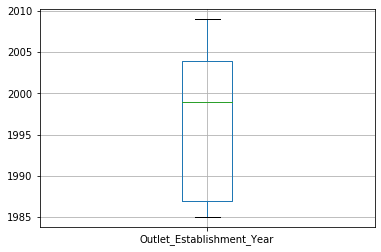

In [16]:
data.boxplot(column='Outlet_Establishment_Year')
plt.show()

In [17]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature]
continuous_features

['Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight']

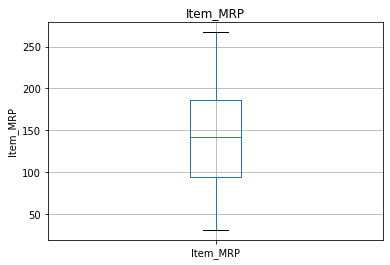

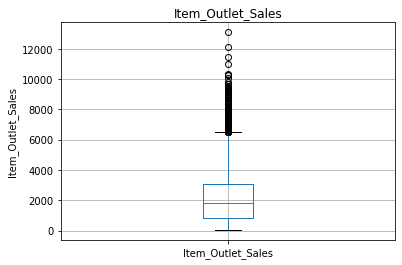

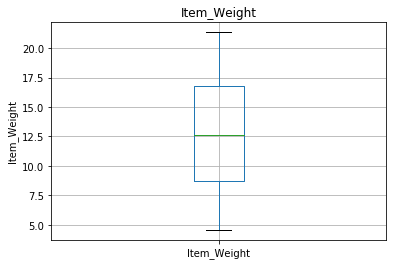

In [18]:
#checking for outliers
for feature in continuous_features:
    data1=data.copy()
    if 0 in data1[feature].unique():
        pass
    else:
        #data1[feature]=np.log(data1[feature])
        data1.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [19]:
#categorical features
categorical_features = [feature for feature in data.columns if data[feature].dtypes =='O']
categorical_features

['Item_Fat_Content',
 'Item_Identifier',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type']

In [20]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is Item_Fat_Content and number of categories are 5
The feature is Item_Identifier and number of categories are 1559
The feature is Item_Type and number of categories are 16
The feature is Outlet_Identifier and number of categories are 10
The feature is Outlet_Location_Type and number of categories are 3
The feature is Outlet_Size and number of categories are 4
The feature is Outlet_Type and number of categories are 4


In [21]:
'''for feature in categorical_features:
    data2=data.copy()
    data2.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Item_Outlet_Sales')
    plt.title(feature)
    plt.show()'''

"for feature in categorical_features:\n    data2=data.copy()\n    data2.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()\n    plt.xlabel(feature)\n    plt.ylabel('Item_Outlet_Sales')\n    plt.title(feature)\n    plt.show()"

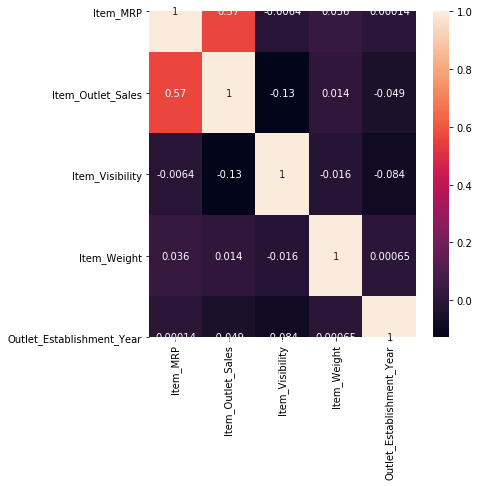

In [22]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(),annot=True)

In [23]:
#we need to fill the missing values: Item_Weight & Outlet_Size 
#imputing Item_Weight with median()
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [24]:
#Since Outlet_Size is a categorical feature, we can fill it with a label
data['Outlet_Size'] = data['Outlet_Size'].fillna('Medium')
#data['Outlet_Size']

In [25]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [26]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [27]:
#Simplyfing the store age
data['Store_Age'] = 2020 - data['Outlet_Establishment_Year']
data.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
data.Store_Age.unique()

array([21, 11, 22, 33, 35, 18, 13, 23, 16], dtype=int64)

In [28]:
le = LabelEncoder()

for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature])
    

In [29]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Store_Age
0,0,156,249.8092,3735.1380,4,0.016047,9.30,9,0,1,1,21
1,1,8,48.2692,443.4228,14,0.019278,5.92,3,2,1,2,11
2,0,662,141.6180,2097.2700,10,0.016760,17.50,9,0,1,1,21
3,1,1121,182.0950,732.3800,6,0.000000,19.20,0,2,1,0,22
4,0,1297,53.8614,994.7052,9,0.000000,8.93,1,2,0,1,33


In [30]:
feature_scale = [feature for feature in data.columns if feature not in ['Item_Outlet_Sales']]

scaler = MinMaxScaler()

scaler.fit(data[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [31]:
data.head(100)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Store_Age
0,0,156,249.8092,3735.1380,4,0.016047,9.300000,9,0,1,1,21
1,1,8,48.2692,443.4228,14,0.019278,5.920000,3,2,1,2,11
2,0,662,141.6180,2097.2700,10,0.016760,17.500000,9,0,1,1,21
3,1,1121,182.0950,732.3800,6,0.000000,19.200000,0,2,1,0,22
4,0,1297,53.8614,994.7052,9,0.000000,8.930000,1,2,0,1,33
5,1,758,51.4008,556.6088,0,0.000000,10.395000,3,2,1,2,11
6,1,696,57.6588,343.5528,13,0.012741,13.650000,1,2,0,1,33
7,0,738,107.7622,4022.7636,13,0.127470,12.792854,5,2,1,3,35
8,1,440,96.9726,1076.5986,5,0.016687,16.200000,7,1,1,1,18
9,1,990,187.8214,4710.5350,5,0.094450,19.200000,2,1,1,1,13


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Fat_Content        14204 non-null int32
Item_Identifier         14204 non-null int32
Item_MRP                14204 non-null float64
Item_Outlet_Sales       8523 non-null float64
Item_Type               14204 non-null int32
Item_Visibility         14204 non-null float64
Item_Weight             14204 non-null float64
Outlet_Identifier       14204 non-null int32
Outlet_Location_Type    14204 non-null int32
Outlet_Size             14204 non-null int32
Outlet_Type             14204 non-null int32
Store_Age               14204 non-null int64
dtypes: float64(4), int32(7), int64(1)
memory usage: 943.4 KB


In [33]:
train1 = data.iloc[:8523,:]

In [34]:
train1.shape

(8523, 12)

In [35]:
train1.to_csv('train_pp2.csv', index=False)

In [36]:
test1 = data.iloc[8523:, :]

In [37]:
test1.shape

(5681, 12)

In [38]:
test1.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Store_Age
8523,0,1114,107.8622,NaN,13,0.007565,20.750000,9,0,1,1,21
8524,1,1078,87.3198,NaN,4,0.038428,8.300000,2,1,1,1,13
8525,0,1420,241.7538,NaN,11,0.099575,14.600000,0,2,1,0,22
8526,0,817,155.0340,NaN,13,0.015388,7.315000,2,1,1,1,13
8527,1,1197,234.2300,NaN,4,0.118599,12.792854,5,2,1,3,35


In [39]:
test1.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
test1.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Store_Age
8523,0,1114,107.8622,13,0.007565,20.750000,9,0,1,1,21
8524,1,1078,87.3198,4,0.038428,8.300000,2,1,1,1,13
8525,0,1420,241.7538,11,0.099575,14.600000,0,2,1,0,22
8526,0,817,155.0340,13,0.015388,7.315000,2,1,1,1,13
8527,1,1197,234.2300,4,0.118599,12.792854,5,2,1,3,35


In [66]:
test1.to_csv('test_pp.csv', index=False)

In [42]:
X = pd.read_csv('train_pp2.csv')

In [43]:
X.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Store_Age
0,0,156,249.8092,3735.1380,4,0.016047,9.30,9,0,1,1,21
1,1,8,48.2692,443.4228,14,0.019278,5.92,3,2,1,2,11
2,0,662,141.6180,2097.2700,10,0.016760,17.50,9,0,1,1,21
3,1,1121,182.0950,732.3800,6,0.000000,19.20,0,2,1,0,22
4,0,1297,53.8614,994.7052,9,0.000000,8.93,1,2,0,1,33


In [44]:
features = X.columns
features

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Store_Age'],
      dtype='object')

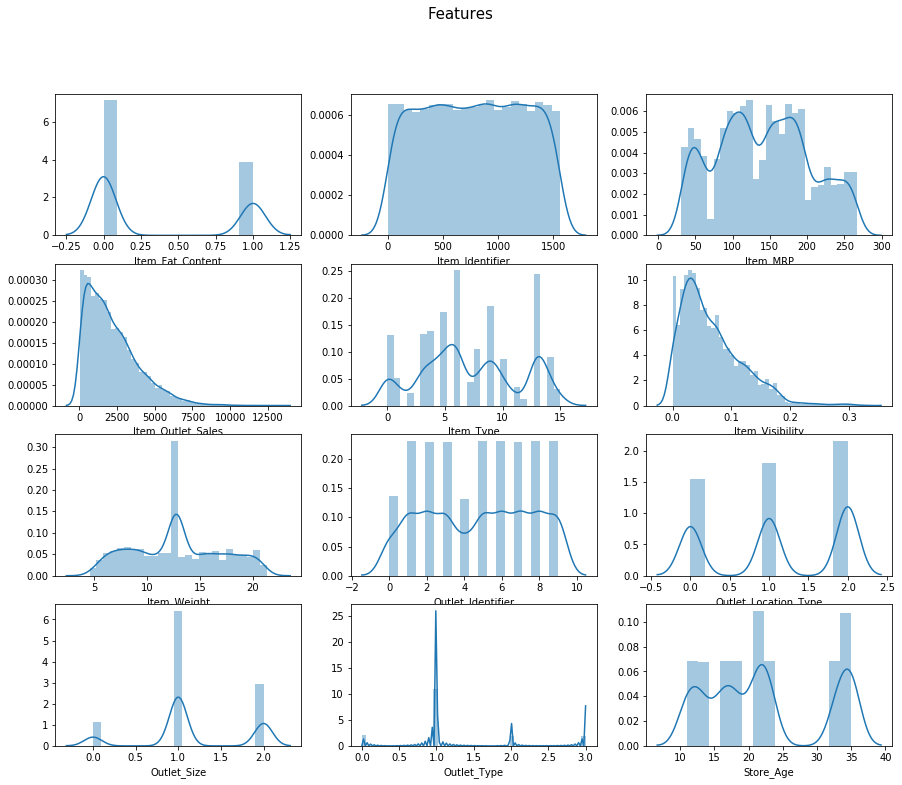

In [45]:
plt.figure(figsize=(15,12))
plt.suptitle('Features', fontsize=15)
for i in range(0, X[features].shape[1]):
    plt.subplot(4, 3, i+1)
    sns.distplot(X[features].iloc[:, i])

In [46]:
y = X['Item_Outlet_Sales']
X = X.drop(['Item_Outlet_Sales'], axis=1)

In [47]:
#Store_Age, Outlet_Size, Item_MRP, Item_Outlet_Sales, Item_Visibility
#Normalizing
#X['Item_MRP']= np.log(X['Item_MRP'])
#X['Item_Visibility']= np.log(X['Item_Visibility'])
#X['Item_Outlet_Sales']= np.log(X['Item_Outlet_Sales'])
#X['Store_Age']= np.log(X['Store_Age'])
#X['Outlet_Size']= np.log(X['Outlet_Size'])

In [48]:
X.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Store_Age
0,0,156,249.8092,4,0.016047,9.30,9,0,1,1,21
1,1,8,48.2692,14,0.019278,5.92,3,2,1,2,11
2,0,662,141.6180,10,0.016760,17.50,9,0,1,1,21
3,1,1121,182.0950,6,0.000000,19.20,0,2,1,0,22
4,0,1297,53.8614,9,0.000000,8.93,1,2,0,1,33


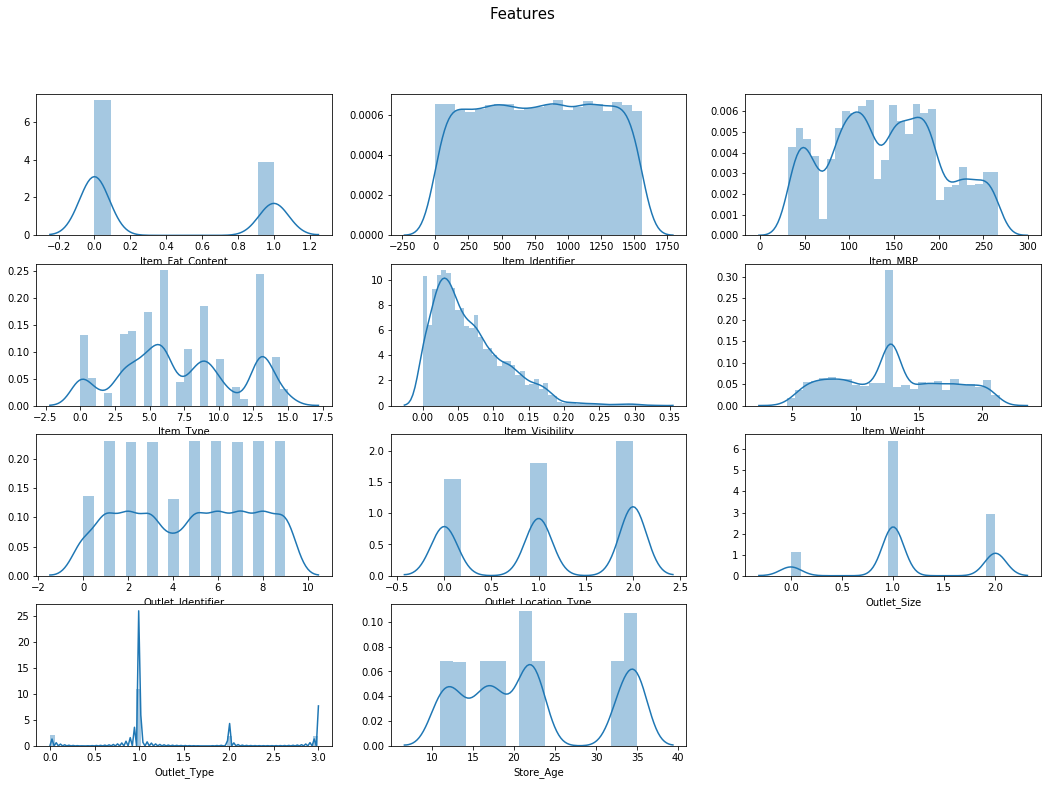

In [49]:
features_f = X.columns
plt.figure(figsize=(18,12))
plt.suptitle('Features', fontsize=15)
for i in range(0, X[features_f].shape[1]):
    plt.subplot(4, 3, i+1)
    sns.distplot(X[features_f].iloc[:, i])

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.25,random_state=0)

In [51]:
LR=LinearRegression()

LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_preds=LR.predict(X_test)

In [53]:
rmse=np.sqrt(mean_squared_error(y_preds,y_test))
print('RMSE for Linear Regression:{0:.2f}'.format(rmse))

RMSE for Linear Regression:1213.04


Text(0.5, 1, 'Linear Regression \n RMSE: 1213.04')

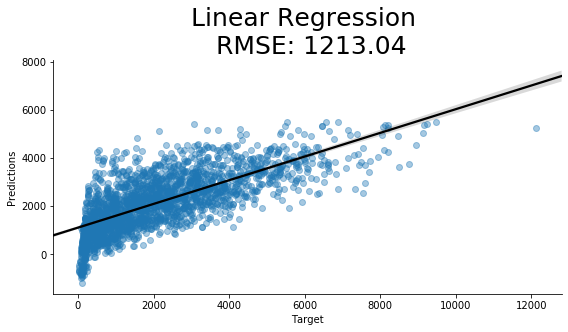

In [54]:
reg_lin_df=pd.DataFrame()
reg_lin_df['Target']=y_test
reg_lin_df['Predictions']=y_preds

sns.lmplot('Target','Predictions',data=reg_lin_df,height=4,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Linear Regression \n RMSE: {0:.2f}'.format(rmse),size=25)

In [55]:
reg_rid=RidgeCV(cv=8, normalize=True)
reg_rid.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=8, fit_intercept=True,
        gcv_mode=None, normalize=True, scoring=None, store_cv_values=False)

In [56]:
y_preds_rid=reg_rid.predict(X_test)
rmse_rid=np.sqrt(mean_squared_error(y_preds_rid,y_test))
print('RMSE for Ridge Regression:{0:.2f}'.format(rmse_rid))

RMSE for Ridge Regression:1221.62


Text(0.5, 1, 'Ridge Regression \n RMSE: 1221.62')

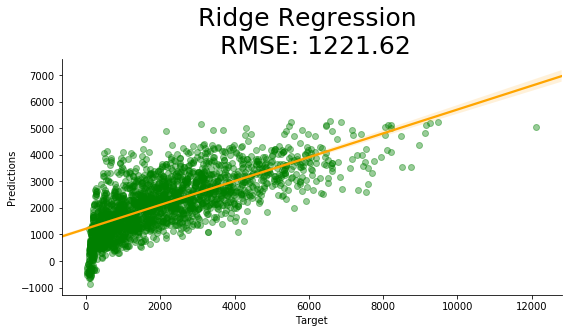

In [57]:
reg_rid_df=pd.DataFrame()
reg_rid_df['Target']=y_test
reg_rid_df['Predictions']=y_preds_rid

sns.lmplot('Target','Predictions',data=reg_rid_df,height=4,aspect=2,line_kws={'color':'orange'},scatter_kws={'alpha':0.4,'color':'green'})
plt.title('Ridge Regression \n RMSE: {0:.2f}'.format(rmse_rid),size=25)

In [58]:
reg_las=Lasso()
reg_las.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
y_preds_las=reg_las.predict(X_test)
rmse_las=np.sqrt(mean_squared_error(y_preds_las,y_test))
print('RMSE for Lasso Regression:{0:.2f}'.format(rmse_las))

RMSE for Lasso Regression:1213.26


Text(0.5, 1, 'Lasso Regression \n RMSE: 1213.26')

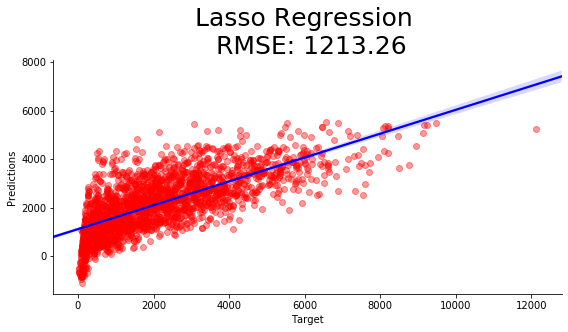

In [60]:
reg_las_df=pd.DataFrame()
reg_las_df['Target']=y_test
reg_las_df['Predictions']=y_preds_las

sns.lmplot('Target','Predictions',data=reg_las_df,height=4,aspect=2,line_kws={'color':'blue'},scatter_kws={'alpha':0.4,'color':'red'})
plt.title('Lasso Regression \n RMSE: {0:.2f}'.format(rmse_las),size=25)

In [61]:
import xgboost

regressor = xgboost.XGBRegressor(base_score=0.25, 
                                 booster='gbtree', 
                                 learning_rate=0.05, 
                                 max_delta_step=0,
                                 max_depth=2, 
                                 min_child_weight=1, 
                                 n_estimators=900,
                                 verbosity=1)

In [62]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=1)

In [63]:
y_preds_xgb=regressor.predict(X_test)
xgb=np.sqrt(mean_squared_error(y_preds_xgb,y_test))
print('RMSE for Ridge Regression:{0:.2f}'.format(xgb))

RMSE for Ridge Regression:1116.17


Text(0.5, 1, 'XGB Regression \n RMSE: 1116.17')

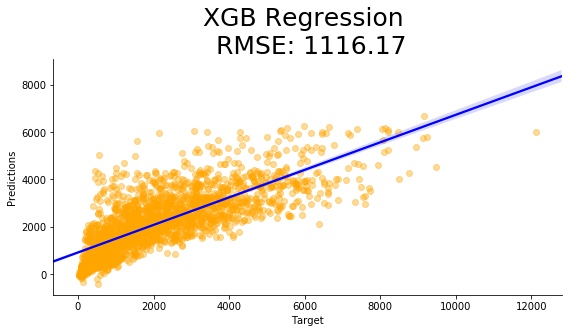

In [64]:
reg_xgb_df=pd.DataFrame()
reg_xgb_df['Target']=y_test
reg_xgb_df['Predictions']=y_preds_xgb

sns.lmplot('Target','Predictions',data=reg_xgb_df,height=4,aspect=2,line_kws={'color':'blue'},scatter_kws={'alpha':0.4,'color':'orange'})
plt.title('XGB Regression \n RMSE: {0:.2f}'.format(xgb),size=25)

In [67]:
df_test = pd.read_csv('test_pp.csv')

In [68]:
predictions = regressor.predict(df_test)
final = pd.DataFrame({"Item_Identifier":test_1["Item_Identifier"],"Outlet_Identifier":test_1["Outlet_Identifier"],"Item_Outlet_Sales":abs(predictions)})
final.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1532.540527
1,FDW14,OUT017,1453.640869
2,NCN55,OUT010,695.608398
3,FDQ58,OUT017,2488.542969
4,FDY38,OUT027,5668.446777


In [69]:
final.to_csv('Submission_fin.csv',index=False,header=True)